# ASSIGNMENT 5
Submitted by: Arundhuti Chakraborty

# Importing Neccesary Packages

In [58]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras import datasets, layers, models, callbacks
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

# Importing Data And Preprocessing

In [35]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
train = pd.read_csv("/content/drive/MyDrive/Gender_Classification/train_nLPp5K8 (1)/train.csv")
test=pd.read_csv("/content/drive/MyDrive/Gender_Classification/test_fkwGUNG (1).csv")

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12196 entries, 0 to 12195
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image_names  12196 non-null  object
 1   class        12196 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 190.7+ KB


In [38]:
train['class'].value_counts()

1    6174
0    6022
Name: class, dtype: int64

In [39]:
image_dir="/content/drive/MyDrive/Gender_Classification/train_nLPp5K8 (1)/images"

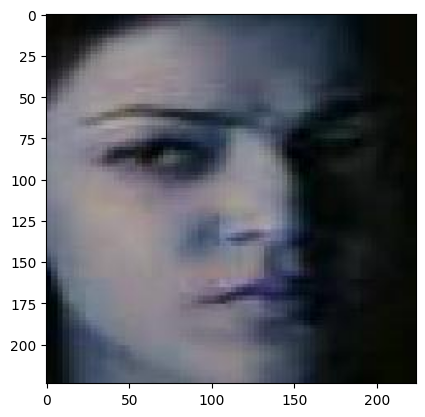

In [40]:
im = cv2.imread("/content/drive/MyDrive/Gender_Classification/train_nLPp5K8 (1)/images/1234.jpg")
im2 = cv2.imread("/content/drive/MyDrive/Gender_Classification/train_nLPp5K8 (1)/images/66.jpg")

plt.imshow(im)

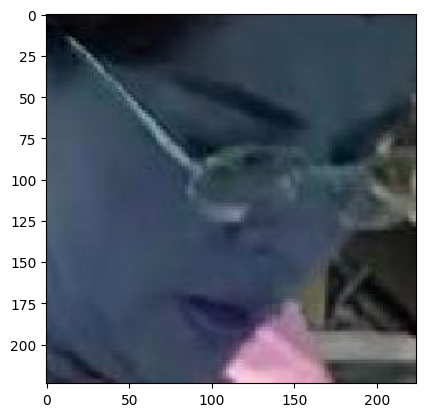

In [41]:
plt.imshow(im2)

In [42]:
# Convert the "class" column to string type
train['class'] = train['class'].astype(str)

In [43]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,        # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,    # Randomly shift images horizontally by up to 20% of the width
    height_shift_range=0.2,   # Randomly shift images vertically by up to 20% of the height
    horizontal_flip=True,     # Randomly flip images horizontally
    vertical_flip=True,       # Randomly flip images vertically
    brightness_range=[0.8, 1.2],  # Randomly adjust brightness
    zoom_range=[0.8, 1.2],   # Randomly zoom in or out
    shear_range=0.2,          # Randomly apply shear transformations
    fill_mode='nearest'       # Fill in missing pixels using the nearest neighbor strategy
)
batch_size=32

In [44]:
traingen = datagen.flow_from_dataframe(
    dataframe=train[:9756],
    directory=image_dir,
    x_col='image_names',
    y_col='class',
    class_mode='binary',
    batch_size=batch_size,
    target_size=(32, 32)
)

Found 9756 validated image filenames belonging to 2 classes.


In [45]:
valgen = datagen.flow_from_dataframe(
    dataframe=train[9756:],
    directory=image_dir,
    x_col='image_names',
    y_col='class',
    class_mode='binary',
    batch_size=50,
    target_size=(32, 32)
)

Found 2440 validated image filenames belonging to 2 classes.


In [46]:
trainsample = next(traingen)
print("Dimensions of training sample", trainsample[0].shape)

Dimensions of training sample (32, 32, 32, 3)


In [47]:
valsample = next(valgen)
print("Dimensions of validation sample",valsample[0].shape)

Dimensions of validation sample (50, 32, 32, 3)


In [48]:
num_train_samples = traingen.samples
num_val_samples = valgen.samples

print("Number of training samples", num_train_samples)
print("Number of validation samples", num_val_samples)

Number of training samples 9756
Number of validation samples 2440


In [49]:
# Define hyperparameters
num_conv_layers = 4  #  number of convolutional layers
num_filters = [16, 32, 64, 128]  #  number of filters for each convolutional layer
filter_sizes = [(3, 3), (3, 3), (3, 3), (3, 3)]  # Changed filter sizes for each convolutional layer
pooling_type = 'max'  # Change pooling type to 'max' or 'average'
padding_type = 'same'  # Change padding technique to 'valid' or 'same'
stride = (1, 1)  # Change stride


In [50]:
# Build the CNN model
model = Sequential()

# Add convolutional layers
for i in range(num_conv_layers):
    model.add(Conv2D(num_filters[i], filter_sizes[i], padding=padding_type, strides=stride, input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))

    if pooling_type == 'max':
        model.add(MaxPooling2D(pool_size=(2, 2)))
    elif pooling_type == 'average':
        model.add(AveragePooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Dense Layers
model.add(Dense(10))
model.add(Dense(1, activation='sigmoid'))

# Compile the Model
optimizer = Adam(learning_rate=0.001)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Training
history = model.fit(traingen,
                    steps_per_epoch=num_train_samples // 50,  # Adjust batch size here
                    epochs=30,
                    validation_data=valgen,
                    validation_steps=num_val_samples // 50)  # Adjust batch size here


Epoch 1/30
195/195 [==============================] - 38s 179ms/step - loss: 0.6809 - accuracy: 0.6162 - val_loss: 0.6840 - val_accuracy: 0.5296
Epoch 2/30
195/195 [==============================] - 38s 195ms/step - loss: 0.6014 - accuracy: 0.6716 - val_loss: 0.6297 - val_accuracy: 0.6292
Epoch 3/30
195/195 [==============================] - 37s 192ms/step - loss: 0.5729 - accuracy: 0.7001 - val_loss: 0.5706 - val_accuracy: 0.7017
Epoch 4/30
195/195 [==============================] - 37s 191ms/step - loss: 0.5433 - accuracy: 0.7194 - val_loss: 0.5783 - val_accuracy: 0.7237
Epoch 5/30
195/195 [==============================] - 39s 201ms/step - loss: 0.5249 - accuracy: 0.7412 - val_loss: 0.6601 - val_accuracy: 0.6671
Epoch 6/30
195/195 [==============================] - 37s 188ms/step - loss: 0.5124 - accuracy: 0.7474 - val_loss: 0.5018 - val_accuracy: 0.7538
Epoch 7/30
195/195 [==============================] - 36s 185ms/step - loss: 0.4954 - accuracy: 0.7579 - val_loss: 0.5254 - val_ac

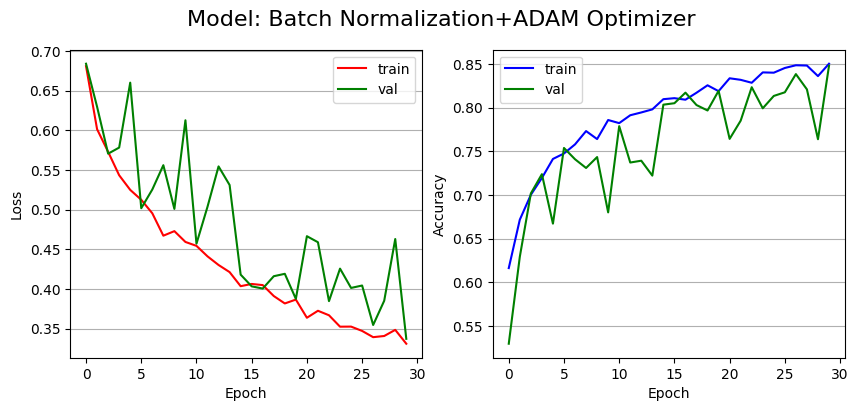

In [51]:
import matplotlib.pyplot as plt

# Plotting the loss
figure = plt.figure(figsize=(10, 4))
ax = plt.subplot(121)

ax.plot(history.history['loss'], 'r', label='train')
ax.plot(history.history['val_loss'], 'g', label='val')

plt.legend()
plt.grid(axis='y')
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Plotting the accuracy
ax2 = plt.subplot(122)
ax2.plot(history.history['accuracy'], 'b', label="train")
ax2.plot(history.history['val_accuracy'], 'g', label="val")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(axis='y')
model_title = ("Model: Batch Normalization+ADAM Optimizer ")
plt.suptitle(model_title, fontsize=16)

plt.show()


In [52]:
# Build the CNN model
model2 = Sequential()

# Add convolutional layers
for i in range(num_conv_layers):
    model2.add(Conv2D(num_filters[i], filter_sizes[i], padding=padding_type, strides=stride, input_shape=(32, 32, 3)))
    model2.add(BatchNormalization())
    model2.add(Activation("relu"))

    if pooling_type == 'max':
        model2.add(MaxPooling2D(pool_size=(2, 2)))
    elif pooling_type == 'average':
        model2.add(AveragePooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model2.add(Flatten())

# Dense Layers with options to adjust
model2.add(Dense(128))  # Dense layer without specifying activation
model2.add(BatchNormalization())  # Batch normalization after dense layer
model2.add(Activation('tanh'))  # Tanh activation function
model2.add(Dropout(0.2))  # Example of adding dropout layer
model2.add(Dense(1, activation='sigmoid'))

# Compile the Model (with options to adjust)
optimizer = SGD(learning_rate=0.001)  # Change the optimizer
loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)
model2.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Implement Early Stopping
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Training (with options to adjust)
history = model2.fit(traingen,
                     steps_per_epoch=num_train_samples // 50,  # Adjust batch size here
                     epochs=30,
                     validation_data=valgen,
                     validation_steps=num_val_samples // 50,  # Adjust batch size here
                     callbacks=[early_stopping])

Epoch 1/30
195/195 [==============================] - 39s 194ms/step - loss: 0.7328 - accuracy: 0.5329 - val_loss: 0.6903 - val_accuracy: 0.5342
Epoch 2/30
195/195 [==============================] - 37s 190ms/step - loss: 0.6908 - accuracy: 0.5813 - val_loss: 0.6718 - val_accuracy: 0.5788
Epoch 3/30
195/195 [==============================] - 36s 183ms/step - loss: 0.6689 - accuracy: 0.6046 - val_loss: 0.6490 - val_accuracy: 0.6325
Epoch 4/30
195/195 [==============================] - 36s 183ms/step - loss: 0.6705 - accuracy: 0.6113 - val_loss: 0.6264 - val_accuracy: 0.6504
Epoch 5/30
195/195 [==============================] - 37s 192ms/step - loss: 0.6566 - accuracy: 0.6236 - val_loss: 0.6256 - val_accuracy: 0.6592
Epoch 6/30
195/195 [==============================] - 36s 186ms/step - loss: 0.6505 - accuracy: 0.6240 - val_loss: 0.6281 - val_accuracy: 0.6521
Epoch 7/30
195/195 [==============================] - 37s 191ms/step - loss: 0.6375 - accuracy: 0.6418 - val_loss: 0.6132 - val_ac

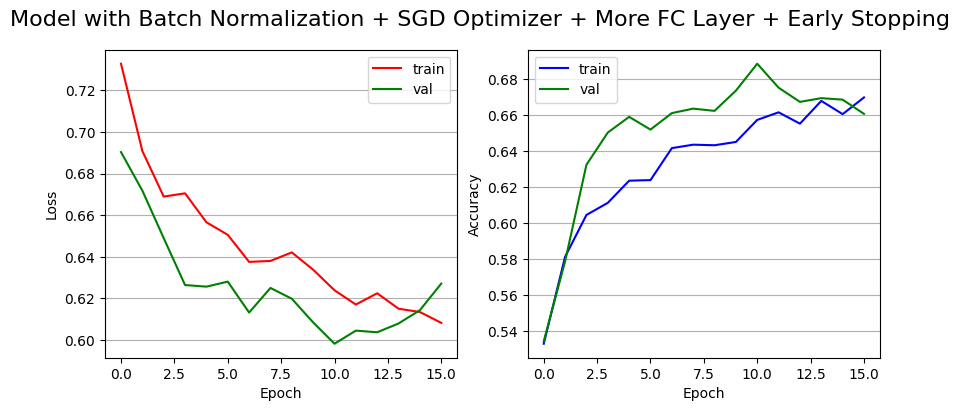

In [53]:
import matplotlib.pyplot as plt

# Plotting the loss
figure = plt.figure(figsize=(10, 4))
ax = plt.subplot(121)

ax.plot(history.history['loss'], 'r', label='train')
ax.plot(history.history['val_loss'], 'g', label='val')

plt.legend()
plt.grid(axis='y')
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Plotting the accuracy
ax2 = plt.subplot(122)
ax2.plot(history.history['accuracy'], 'b', label="train")
ax2.plot(history.history['val_accuracy'], 'g', label="val")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(axis='y')

# Adjust the title here
model_title = "Model with Batch Normalization + SGD Optimizer + More FC Layer + Early Stopping"
plt.suptitle(model_title, fontsize=16)

plt.show()


In [67]:
# Define hyperparameters
num_conv_layers1 = 5  # Increase the number of convolutional layers
num_filters = [32, 64, 128, 256, 512]  # Increase the number of filters for each convolutional layer
filter_sizes = [(3, 3), (3, 3), (3, 3), (3, 3), (3, 3)]  # Changed filter sizes for each convolutional layer
pooling_type = 'average'  # Change pooling type to 'max' or 'average'
padding_type = 'same'  # Change padding technique to 'valid' or 'same'
stride = (1,1)



In [68]:

# Build the CNN model
model3 = Sequential()

# Add convolutional layers
for i in range(num_conv_layers1):
    model3.add(Conv2D(num_filters[i], filter_sizes[i], padding=padding_type, strides=stride, input_shape=(32, 32, 3)))
    model3.add(BatchNormalization())
    model3.add(Activation("relu"))

    if pooling_type == 'max':
        model3.add(MaxPooling2D(pool_size=(2, 2)))
    elif pooling_type == 'average':
        model3.add(AveragePooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model3.add(Flatten())

# Dense Layers
model3.add(Dense(10))
model3.add(Dense(1, activation='sigmoid'))

# Compile the Model
optimizer = Adam(learning_rate=0.001)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)
model3.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Training
history = model3.fit(traingen,
                     steps_per_epoch=num_train_samples // 50,  # Adjust batch size here
                     epochs=30,
                     validation_data=valgen,
                     validation_steps=num_val_samples // 50)  # Adjust batch size here

Epoch 1/30
195/195 [==============================] - 88s 441ms/step - loss: 0.7038 - accuracy: 0.5967 - val_loss: 0.6769 - val_accuracy: 0.5550
Epoch 2/30
195/195 [==============================] - 85s 433ms/step - loss: 0.6463 - accuracy: 0.6353 - val_loss: 0.6587 - val_accuracy: 0.6112
Epoch 3/30
195/195 [==============================] - 83s 425ms/step - loss: 0.6299 - accuracy: 0.6499 - val_loss: 0.6024 - val_accuracy: 0.6779
Epoch 4/30
195/195 [==============================] - 97s 499ms/step - loss: 0.6066 - accuracy: 0.6681 - val_loss: 0.6453 - val_accuracy: 0.6458
Epoch 5/30
195/195 [==============================] - 103s 525ms/step - loss: 0.5927 - accuracy: 0.6819 - val_loss: 0.6282 - val_accuracy: 0.6463
Epoch 6/30
195/195 [==============================] - 86s 442ms/step - loss: 0.5631 - accuracy: 0.7054 - val_loss: 0.7492 - val_accuracy: 0.6263
Epoch 7/30
195/195 [==============================] - 84s 430ms/step - loss: 0.5484 - accuracy: 0.7155 - val_loss: 0.5531 - val_a

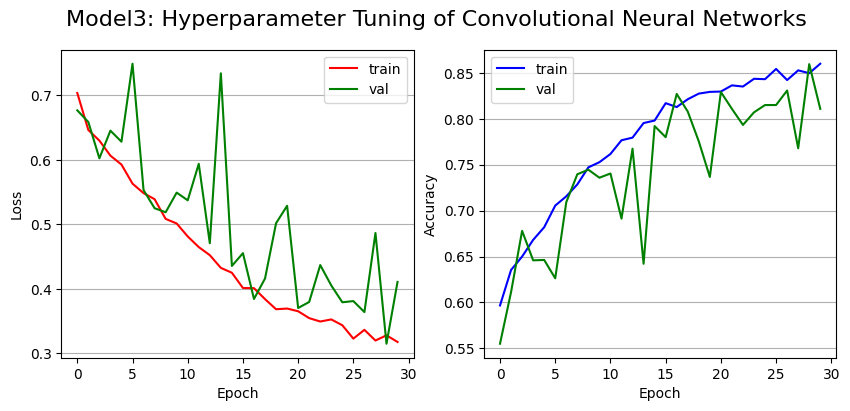

In [69]:
# Plotting the loss
figure = plt.figure(figsize=(10, 4))
ax = plt.subplot(121)

ax.plot(history.history['loss'], 'r', label='train')
ax.plot(history.history['val_loss'], 'g', label='val')

plt.legend()
plt.grid(axis='y')
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Plotting the accuracy
ax2 = plt.subplot(122)
ax2.plot(history.history['accuracy'], 'b', label="train")
ax2.plot(history.history['val_accuracy'], 'g', label="val")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(axis='y')

# Adjust the title here
model_title = "Model3: Hyperparameter Tuning of Convolutional Neural Networks"
plt.suptitle(model_title, fontsize=16)

plt.show()